In [57]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import preprocessing

In [58]:
df = pd.read_excel('C:/Users/ASUS/Documents/Exam_1_Cuantitativo/data_exam1.xlsx', sheet_name='data2')

In [59]:
df.head(5)

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573


In [60]:
df.isna().sum()

Y    0
X    0
dtype: int64

In [61]:
div = df.count()
div

Y    1000
X    1000
dtype: int64

In [62]:
df.describe()


,Y,X
count,1000.000000,1.000000e+03
mean,9.445622,7.234805e-02
std,3.908189,9.753985e-02
min,-12.073239,1.343729e-08
25%,7.411486,8.450417e-03
50%,10.072134,3.655172e-02
75%,12.082546,9.992523e-02
max,17.838788,9.397465e-01


In [63]:
df.dtypes

Y    float64
X    float64
dtype: object

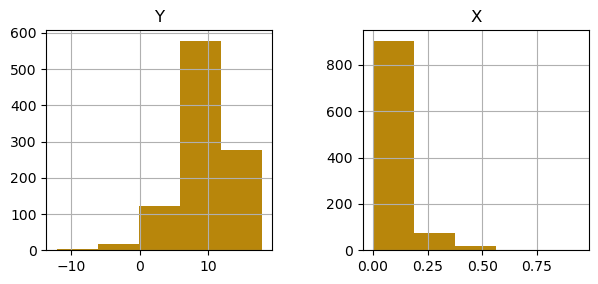

In [64]:

df.hist(bins = 5 , figsize = (7,2 ), color='#B8860B')
plt.subplots_adjust(
                    bottom=0.1   ,
                    top=1.2 ,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x24d0cd88af0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d0cd880a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d0cd884c0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d0ce62c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d0ce62a00>],
 'means': []}

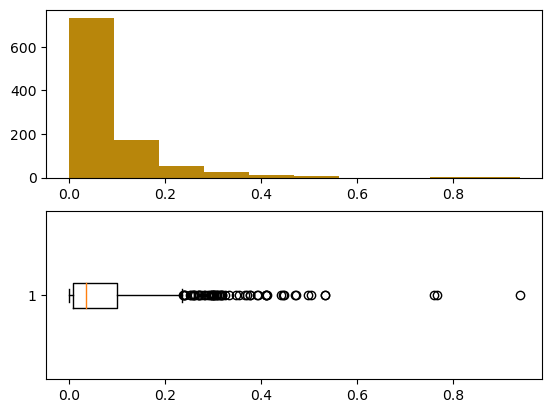

In [65]:
plt.subplot(2, 1, 1)
plt.hist(df['X'], color='#B8860B')

plt.subplot(2, 1, 2)
plt.boxplot(df['X'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x24d0b401220>,
 'caps': [<matplotlib.lines.Line2D at 0x24d0b401eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d0b401850>],
 'medians': [<matplotlib.lines.Line2D at 0x24d0a976040>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d0affbe80>],
 'means': []}

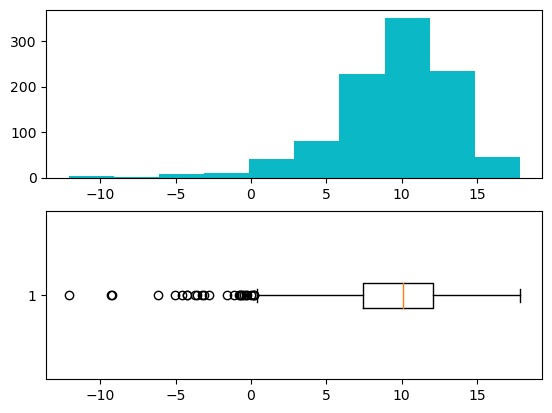

In [66]:
plt.subplot(2, 1, 1)
plt.hist(df['Y'], color='#0BB8C6')

plt.subplot(2, 1, 2)
plt.boxplot(df['Y'], vert = False)

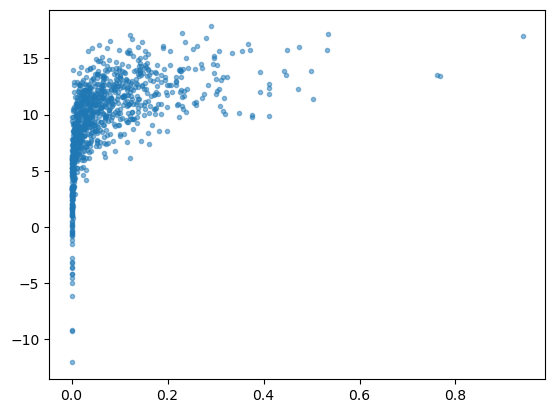

In [99]:

plt.plot(df["X"],df["Y"], '.', alpha = 0.5) ## Estamos graficando los puntos originales
#plt.plot(Ind1["X"],Ind1["Y"], '.', alpha = 0.5, color ='#ADFF2F')
#y_hat = b0 + b1 * df["X"] ### Calculamos los y de nuestro modelo lineal
#plt.plot(df["X"], y_hat, color ='red') ### Ploteamos nuestra recta de regresion
#plt.title("Base on Ind 0")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

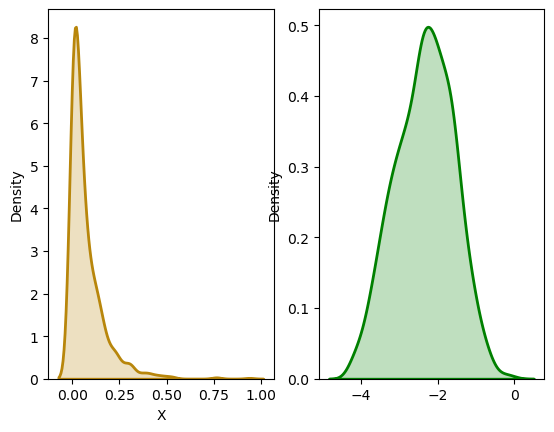

In [100]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(df['X'])
fig, ax = plt.subplots(1, 2)
sns.distplot(df['X'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="#B8860B", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

In [112]:
### Ejecutando un modelo lineal (Regresion Simple)
X = sm.add_constant(fitted_data)
model0 = sm.OLS(df['Y'], X)
results0 = model0.fit()
print(results0.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1712.
Date:                Fri, 12 May 2023   Prob (F-statistic):          1.12e-218
Time:                        18:04:22   Log-Likelihood:                -2282.1
No. Observations:                1000   AIC:                             4568.
Df Residuals:                     998   BIC:                             4578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0507      0.244     78.079      0.0

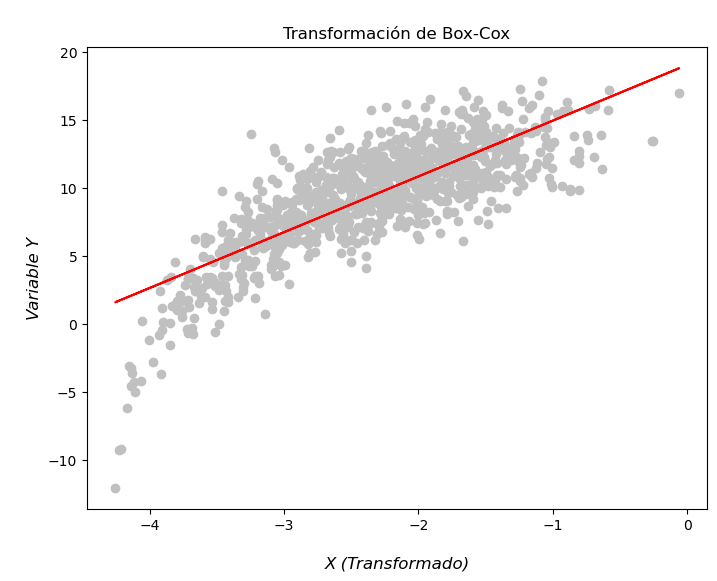

In [123]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(fitted_data, df['Y'], color ='#C0C0C0')
ax.plot(fitted_data, results0.fittedvalues, color='red')

ax.set_title('\nTransformación de Box-Cox')

plt.xlabel('\nX (Transformado)', fontsize=12, color= 'black', fontweight = 'normal',
          fontstyle = 'italic')
plt.ylabel('\nVariable Y', fontsize=12, color= 'black', fontweight = 'normal',
          fontstyle = 'italic')


# Guardamos la gráfica en un archivo PNG
plt.savefig('Table2.png', dpi=300, bbox_inches='tight')

In [92]:
from scipy.stats import shapiro
from scipy.stats import kstest
# 3) Normalidad
### H0: e_i~Normal vs H1: ei !~Normal
print(shapiro(results0.resid))
print(kstest(results0.resid, stats.norm.cdf, alternative='less'))

ShapiroResult(statistic=0.983242928981781, pvalue=2.624277462004443e-09)
KstestResult(statistic=0.19138186173477523, pvalue=7.468245960401788e-33)


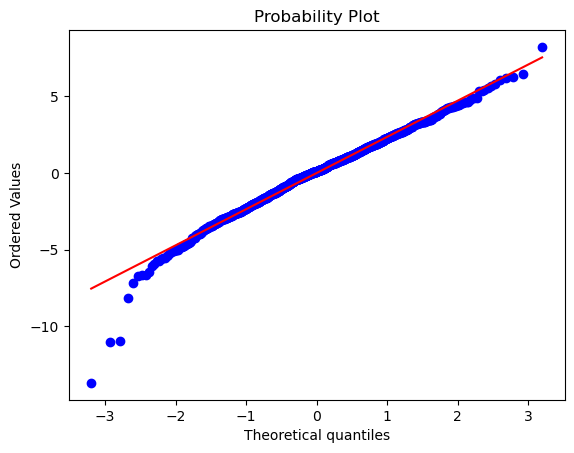

In [93]:

from scipy.stats  import probplot
import pylab
probplot(results0.resid, dist = "norm", plot = pylab)
plt.show()

Cube Root Transformation in Python

Text(0.5, 1.0, 'Cube Root Transformed Data')

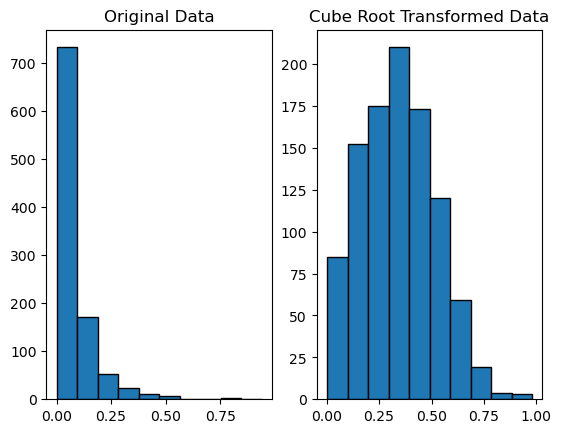

In [73]:
'''
segundo intento

'''
data_log = np.cbrt(df['X'])
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df['X'], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

In [95]:
### Ejecutando un modelo lineal (Regresion Simple)
X = sm.add_constant(data_log)
model2 = sm.OLS(df['Y'], X)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     914.3
Date:                Fri, 12 May 2023   Prob (F-statistic):          4.29e-143
Time:                        17:55:47   Log-Likelihood:                -2456.4
No. Observations:                1000   AIC:                             4917.
Df Residuals:                     998   BIC:                             4927.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6791      0.153     37.050      0.0

In [96]:
from scipy.stats import shapiro
from scipy.stats import kstest
# 3) Normalidad
### H0: e_i~Normal vs H1: ei !~Normal
print(shapiro(results2.resid))
print(kstest(results2.resid, stats.norm.cdf, alternative='less'))

ShapiroResult(statistic=0.9516798257827759, pvalue=1.3176303906783762e-17)
KstestResult(statistic=0.2378812899022047, pvalue=1.4203820485280187e-50)


Square Root Transformation in Python

Text(0.5, 1.0, 'Cube Root Transformed Data')

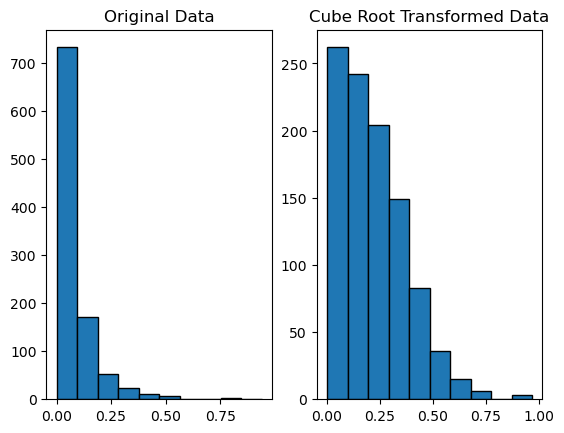

In [97]:
#create log-transformed data
data_log = np.sqrt(df['X'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df['X'], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

In [98]:
X = sm.add_constant(data_log)
model3 = sm.OLS(df['Y'], X)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     914.3
Date:                Fri, 12 May 2023   Prob (F-statistic):          4.29e-143
Time:                        17:56:04   Log-Likelihood:                -2456.4
No. Observations:                1000   AIC:                             4917.
Df Residuals:                     998   BIC:                             4927.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6791      0.153     37.050      0.0

In [78]:
print(shapiro(results3.resid))
print(kstest(results3.resid, stats.norm.cdf))
k2, p = stats.normaltest(data_log)
alpha = 0.05
if p < alpha:
    print("Los datos transformados no siguen una distribución normal")
else:
    print("Los datos transformados siguen una distribución normal")

ShapiroResult(statistic=0.9516798257827759, pvalue=1.3176303906783762e-17)
KstestResult(statistic=0.2378812899022047, pvalue=2.8407640970560373e-50)
Los datos transformados no siguen una distribución normal


In [89]:
xt, _ = stats.yeojohnson(df['X'])

# Verificar la normalidad de los datos transformados
k2, p = stats.normaltest(xt)
alpha = 0.05
if p < alpha:
    print("Los datos transformados no siguen una distribución normal")
else:
    print("Los datos transformados siguen una distribución normal")

x_sqrt = np.sqrt(df['X'])
# 
k2, p = stats.normaltest(x_sqrt)
alpha = 0.05
if p < alpha:
    print("Los datos transformados no siguen una distribución normal")
else:
    print("Los datos transformados siguen una distribución normal")
    
    
x_pow = np.power(df['X'], 2)

k2, p = stats.normaltest(x_pow)
alpha = 0.05
if p < alpha:
    print("Los datos transformados no siguen una distribución normal")
else:
    print("Los datos transformados siguen una distribución normal")
    
    
# Transformación logarítmica (logaritmo natural)
x_log = np.log(df['X'])
k2, p = stats.normaltest(x_log)
alpha = 0.05
if p < alpha:
    print("Los datos transformados no siguen una distribución normal")
else:
    print("Los datos transformados siguen una distribución normal")
    
# Transformación logarítmica (logaritmo base 10)
x_log10 = np.log10(df['X'])
k2, p = stats.normaltest(x_log10)
alpha = 0.05
if p < alpha:
    print("Los datos transformados no siguen una distribución normal")
else:
    print("Los datos transformados siguen una distribución normal")
    
# Transformación sinusoidal (seno)
x_sin = np.sin(df['X'])
k2, p = stats.normaltest(x_sin)
alpha = 0.05
if p < alpha:
    print("Los datos transformados no siguen una distribución normal")
else:
    print("Los datos transformados siguen una distribución normal")
    
# Transformación sinusoidal (coseno)
x_cos = np.cos(df['X'])

k2, p = stats.normaltest(x_cos)
alpha = 0.05
if p < alpha:
    print("Los datos transformados no siguen una distribución normal")
else:
    print("Los datos transformados siguen una distribución normal")
    

Los datos transformados no siguen una distribución normal
Los datos transformados no siguen una distribución normal
Los datos transformados no siguen una distribución normal
Los datos transformados no siguen una distribución normal
Los datos transformados no siguen una distribución normal
Los datos transformados no siguen una distribución normal
Los datos transformados no siguen una distribución normal


In [90]:
from scipy.stats import spearmanr

# Calcular la correlación de Spearman entre dos variables x y y
correlation, pvalue = spearmanr(df['X'], df['Y'])

print('Coeficiente de correlación de Spearman:', correlation)
print('Valor p:', pvalue)

Coeficiente de correlación de Spearman: 0.7678330318330319
Valor p: 3.344205330253986e-195


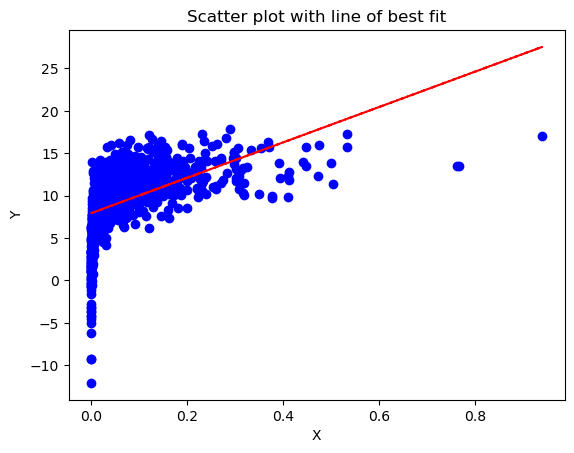

In [81]:
plt.scatter(df['X'], df['Y'], color='b')

# line of best fit
z = np.polyfit(df['X'], df['Y'], 1)
p = np.poly1d(z)
plt.plot(df['X'],p(df['X']),"r--")

# add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with line of best fit')

# show the plot
plt.show()

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Reshape the data to fit the regression model
x = np.array(df['X']).reshape(-1, 1)
y = np.array(df['Y']).reshape(-1, 1)

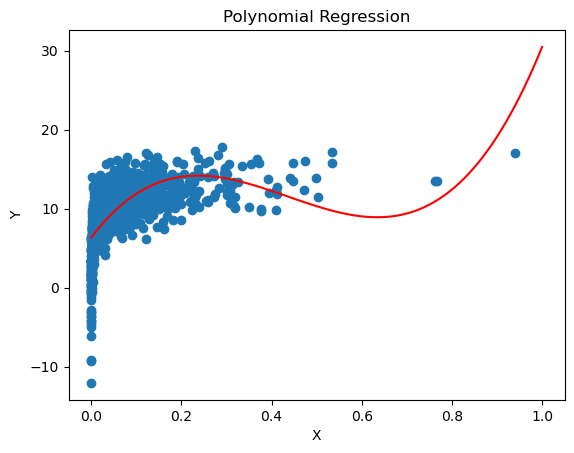

In [83]:
# Create polynomial features up to degree 3
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

# Fit the linear regression model
model = LinearRegression()
model.fit(x_poly, y)

# Make predictions for new data
x_new = np.linspace(0, 1, 100).reshape(-1, 1)
x_new_poly = poly.transform(x_new)
y_new = model.predict(x_new_poly)

# Plot the results
plt.scatter(x, y)
plt.plot(x_new, y_new, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.show()

In [114]:
##### Finalmente nos quedamos con Box-cox
'''
validamos los supuestos a continuacion
'''


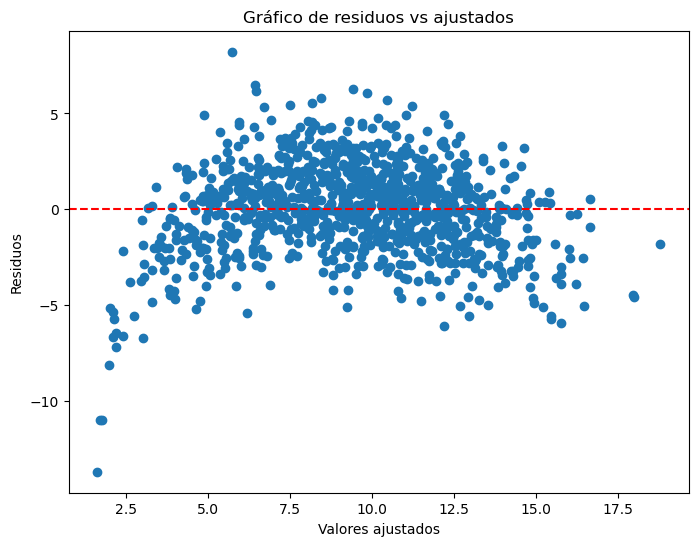

In [115]:
# Aplicamos la transformación de Box-Cox a la variable X
fitted_data, fitted_lambda = stats.boxcox(df['X'])

# Ajustamos el modelo de regresión lineal con la variable transformada
X = sm.add_constant(fitted_data)
model0 = sm.OLS(df['Y'], X)
results0 = model0.fit()

# Graficamos los residuos vs ajustados
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(results0.fittedvalues, results0.resid)
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Valores ajustados')
ax.set_ylabel('Residuos')
ax.set_title('Gráfico de residuos vs ajustados')

plt.show()

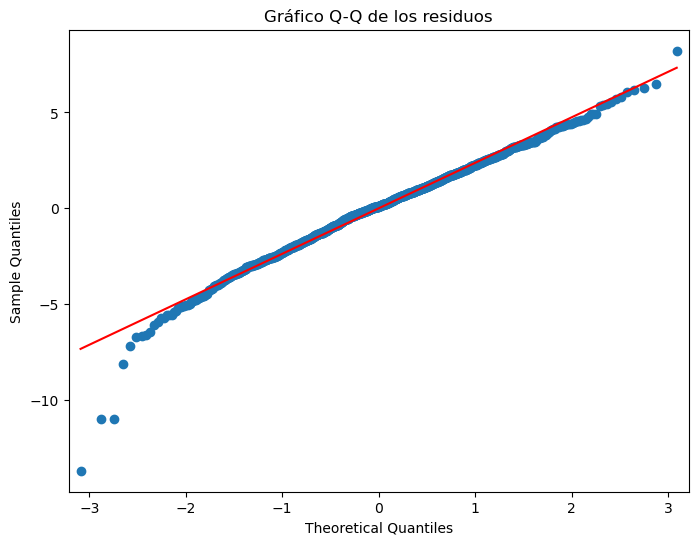

In [116]:

# Ajustamos el modelo de regresión lineal con la variable transformada
X = sm.add_constant(fitted_data)
model0 = sm.OLS(df['Y'], X)
results0 = model0.fit()

# Graficamos el Q-Q plot de los residuos
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(results0.resid, line='s', ax=ax)
ax.set_title('Gráfico Q-Q de los residuos')

plt.show()